<a href="https://colab.research.google.com/github/Aashish123-aikki/MachineLearning/blob/main/StockPrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
!pip install alpaca-trade-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mean squared error: 4.97


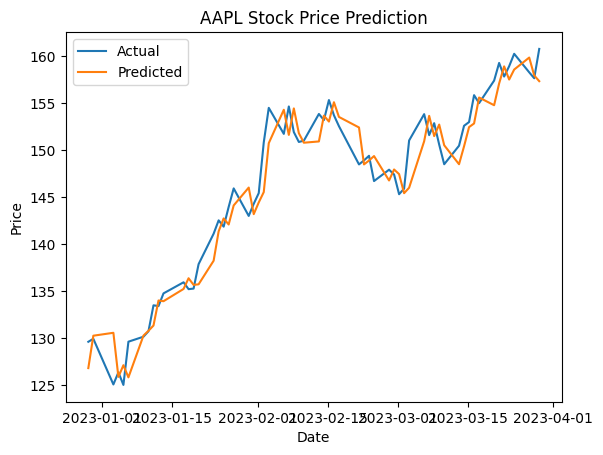

In [272]:
import alpaca_trade_api as tradeapi
import pandas as pd
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# set up API credentials
api_key = 'AK1BKEO4G1UODUVZJJN5'
api_secret = 'eIUg2T6QIx9n5RUNcalejDqahrE1nMgkG63lSXdg'
base_url = 'https://api.alpaca.markets'
api = tradeapi.REST(api_key, api_secret, base_url, api_version='v1')

# get historical price data for a stock
symbol = 'AAPL' # Apple stock symbol
timeframe = '1D' # daily time frame
start_date = '2022-01-01'
end_date = '2023-03-29'
historical_data = api.get_bars(symbol, timeframe, start=start_date, end=end_date).df

# feature engineering: create a new column with the closing price shifted by 1 day
historical_data['yesterday_close'] = historical_data['close'].shift(1)

# drop the first row (which contains NaN values due to the shift)
historical_data = historical_data.dropna()

# split the data into training and testing sets
train_size = int(len(historical_data) * 0.8)
train_data = historical_data[:train_size]
test_data = historical_data[train_size:]

# train a linear regression model using the training data
model = LinearRegression()
model.fit(train_data[['yesterday_close']], train_data['close'])

# make predictions on the test data
predictions = model.predict(test_data[['yesterday_close']])

# evaluate the model using mean squared error
mse = ((predictions - test_data['close']) ** 2).mean()
print(f"Mean squared error: {mse:.2f}")

# plot the actual and predicted stock prices for the test data
plt.plot(test_data.index, test_data['close'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{symbol} Stock Price Prediction')
plt.legend()
plt.show()

In [273]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load historical stock price data into a pandas dataframe
df=historical_data

# Define the number of days in the future to predict
days_to_predict = 30

# Create a new column with the stock price on the target day
df['Target'] = df['close'].shift(-1)

# Drop rows with missing values
df.dropna(inplace=True)

# Define the features to use for the model
features = ['open', 'high', 'low', 'close', 'volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Target'], test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate the root mean squared error of the predictions
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
print('Root mean squared error:', rmse)
print('Mean Square error: ',mse)
print("M A E:",mean_absolute_error(y_test,y_pred))

Root mean squared error: 3.002551956661263
Mean Square error:  9.01531825245038
M A E: 2.3111722100409318


In [274]:

print(y_test[0])

145.31


In [275]:
import yfinance as y

In [276]:
stock='AAPL'
data=y.download(tickers=stock,period='10y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [277]:
data=pd.DataFrame(data)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-01,15.782143,15.846429,15.276429,15.318214,13.230050,389732000
2013-04-02,15.271429,15.647857,15.228571,15.349643,13.257195,529519200
2013-04-03,15.406071,15.617143,15.368214,15.428214,13.325059,363216000
2013-04-04,15.491429,15.535714,15.187500,15.275714,13.193347,358447600
2013-04-05,15.160714,15.176786,14.988571,15.114286,13.053924,383695200
...,...,...,...,...,...,...
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200


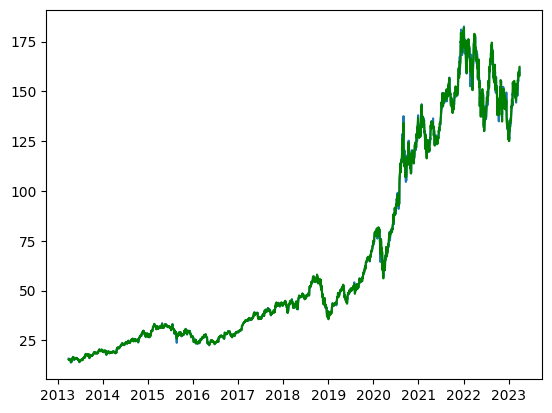

In [278]:
plt.plot(data['Open'])
plt.plot(data['Close'],color='g')

In [279]:
from sklearn.preprocessing import MinMaxScaler

In [280]:
scaler=MinMaxScaler()

In [281]:
scale_fact=[]
for i in data.columns:
  data[i]=scaler.fit_transform(data[[i]])
  scale_fact.append(scaler.scale_)

In [282]:
data=data.reset_index()

In [283]:
from sklearn.model_selection import train_test_split
x=data.drop(['Date','Close','Adj Close'],axis=1)
y=data['Close']


In [284]:
from sklearn.linear_model import LinearRegression

In [285]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [286]:
model.score(x,y)
y_pred=model.predict(x)
y_pred

array([0.00870049, 0.00936414, 0.00946672, ..., 0.84971481, 0.87337102,
       0.88128032])

In [287]:
model.score(x,y)

0.9998598141869329

In [288]:
scl=1/0.00595017
y_pred=y_pred*scl
y=y*scl

In [289]:
y

0         1.370714
1         1.402142
2         1.480713
3         1.328213
4         1.166786
           ...    
2514    146.302440
2515    144.332439
2516    143.702435
2517    146.822444
2518    148.412439
Name: Close, Length: 2519, dtype: float64

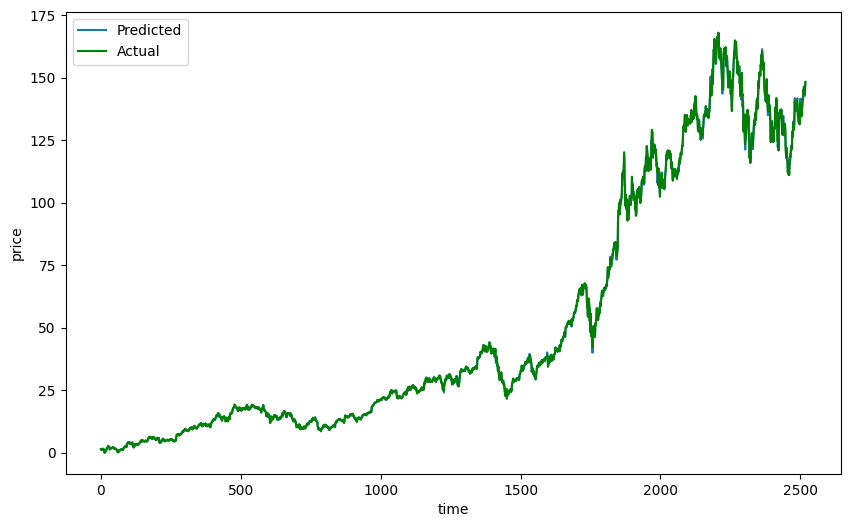

In [290]:
plt.figure(figsize=(10,6))
plt.plot(y_pred,label="Predicted")
plt.plot(y,label="Actual",color='g')
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
